<a href="https://colab.research.google.com/github/MarceliEDU/Braille-Character-Recognition/blob/main/bcr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Braille Character Recognition**
---
https://www.kaggle.com/datasets/shanks0465/braille-character-dataset

##Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping

from pathlib import Path
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.15.0


##Preparing data

In [ ]:
images_dir = Path('/content/drive/MyDrive/Colab Notebooks/archive/Braille Dataset/Braille Dataset');

In [ ]:
dir_list = list(images_dir.glob('*.jpg'))
images_count = len(dir_list)
images_count

1560

In [ ]:
#creating list of characters based on file names
character_list = []
for i in dir_list:
    character_list.append(os.path.basename(i)[0])
ch_list_copy = character_list

In [ ]:
#creating list if images
images = []
for dir in dir_list:
    I = cv2.imread(str(dir))
    images.append(I)

In [ ]:
#turn both lists in numpy arrays
images_list = np.array(images)
character_list = np.array(character_list).T #transpose

In [ ]:
#encodes character_list
le = LabelEncoder()
character_list = le.fit_transform(character_list) #returns encoded labels

In [ ]:
#covert image to 0 to 255 (pixel information)
images_list = images_list / 255.0

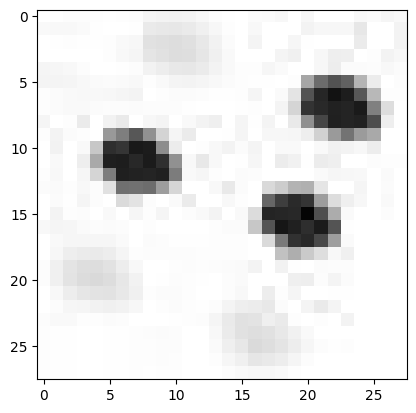

In [ ]:
plt.imshow(images_list[0]) #image check

In [ ]:
#splitting data
testing_data_percent = 20
train_images, test_images, train_characters, test_characters = train_test_split(images_list, character_list, test_size=(testing_data_percent/100), random_state=69)

##Creating model
Adam optimiser
(from https://www.kaggle.com/code/amanrosekaursethi/braille-character-detection-using-cnn)

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),

    keras.layers.Dense(units=576, activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(units=288, activation="relu"),

    keras.layers.Dense(units=26, activation="softmax") #output layer
])

In [ ]:
model.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

In [ ]:
#Keras EarlyStopping - Stop training when a monitored metric has stopped improving.
es1 = EarlyStopping(patience=20, monitor="val_sparse_categorical_accuracy", mode="auto")
es2 = EarlyStopping(patience=20, monitor="val_loss", mode="auto")

#The neural network will stop fitting if it gets 20 epochs without converge

#Training

In [ ]:
history = model.fit(x=train_images,
                    y=train_characters,
                    epochs=100,
                    validation_split=0.3,
                    callbacks=[es1, es2])

Epoch 1/100
28/28 [==============================] - 5s 25ms/step - loss: 3.3182 - sparse_categorical_accuracy: 0.1088 - val_loss: 3.2553 - val_sparse_categorical_accuracy: 0.0453
Epoch 2/100
28/28 [==============================] - 0s 14ms/step - loss: 2.2793 - sparse_categorical_accuracy: 0.3448 - val_loss: 3.8571 - val_sparse_categorical_accuracy: 0.0427
Epoch 3/100
28/28 [==============================] - 0s 10ms/step - loss: 1.6487 - sparse_categorical_accuracy: 0.5189 - val_loss: 5.4623 - val_sparse_categorical_accuracy: 0.0427
Epoch 4/100
28/28 [==============================] - 0s 9ms/step - loss: 1.3736 - sparse_categorical_accuracy: 0.5808 - val_loss: 6.9845 - val_sparse_categorical_accuracy: 0.0427
Epoch 5/100
28/28 [==============================] - 0s 10ms/step - loss: 0.9789 - sparse_categorical_accuracy: 0.7079 - val_loss: 7.9731 - val_sparse_categorical_accuracy: 0.0427
Epoch 6/100
28/28 [==============================] - 0s 10ms/step - loss: 0.8137 - sparse_categorical

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_4 (Bat  (None, 14, 14, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                      

#Checking results

In [ ]:
time = np.arange(1, len(history.history['loss'])+1)

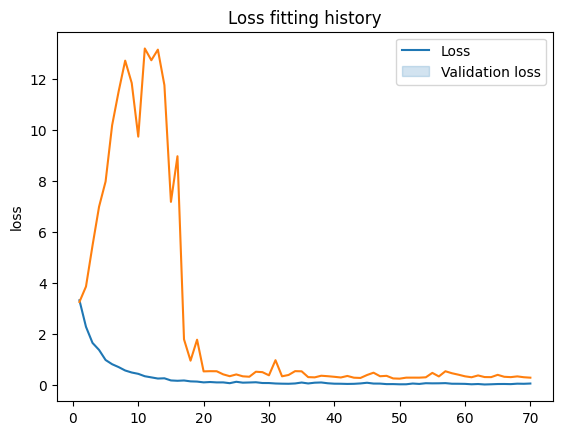

In [ ]:
sns.lineplot(data=history.history, x=time, y='loss')
sns.lineplot(data=history.history, x=time, y='val_loss')
plt.title('Loss fitting history')
plt.legend(labels=['Loss', 'Validation loss'])
plt.show()

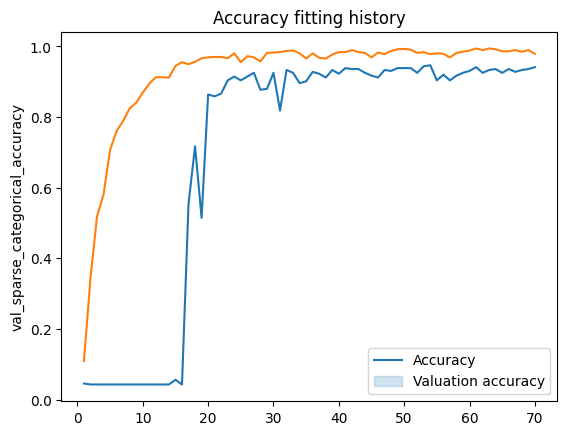

In [ ]:
sns.lineplot(data=history.history, x=time, y='val_sparse_categorical_accuracy')
sns.lineplot(data=history.history, x=time, y='sparse_categorical_accuracy')
plt.title('Accuracy fitting history')
plt.legend(labels=['Accuracy', 'Valuation accuracy'])
plt.show()

In [ ]:
#evaluation
model.evaluate(test_images, test_characters);

10/10 [==============================] - 0s 3ms/step - loss: 0.1604 - sparse_categorical_accuracy: 0.9519


#Testing

Inputted data: 10 - k
1/1 [==============================] - 0s 21ms/step
Predicted class: 10 - k


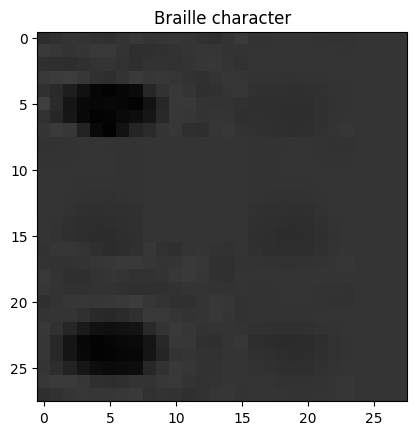

In [ ]:
# 0 - 1559
index = 1559

print("Inputted data:", character_list[index], "-", ch_list_copy[index])


input_image = np.expand_dims(images_list[index], axis=0) #putting image into array

predictions = model.predict(input_image)
predicted_class = np.argmax(predictions)
print("Predicted class:", predicted_class, "-", (chr(ord('a') + predicted_class)))


plt.imshow(images_list[index])
plt.title('Braille character')
plt.show()